In [28]:
import os
import cv2
import glob
import numpy as np
from skimage import morphology, feature
import matplotlib.pyplot as plt

In [29]:
def find_pixels_with_one_neighbor(skeleton_image):
    height, width = skeleton_image.shape
    one_neighbor_pixels = []

    for i in range(1, height-1):
        for j in range(1, width-1):
            if skeleton_image[i, j] == 1:  # Consider only foreground pixels
                neighbor_count = np.sum(skeleton_image[i-1:i+2, j-1:j+2]) - 1  # Subtract the center pixel
                if neighbor_count == 1:
                    one_neighbor_pixels.append((i, j))

    return one_neighbor_pixels

(x, y) endings: (11, 76), (24, 340), (27, 86), (37, 180), (43, 462), (58, 268), (60, 136), (71, 171), (74, 473), (109, 477), (113, 499), (120, 422), (146, 126), (174, 363), (195, 391), (233, 444), (239, 28), 


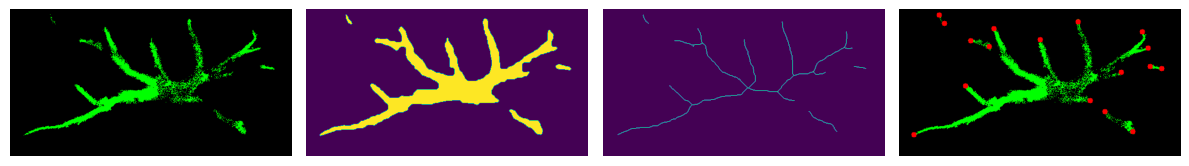

(x, y) endings: (23, 63), (29, 70), (44, 147), (58, 90), (77, 39), (116, 190), (124, 178), 


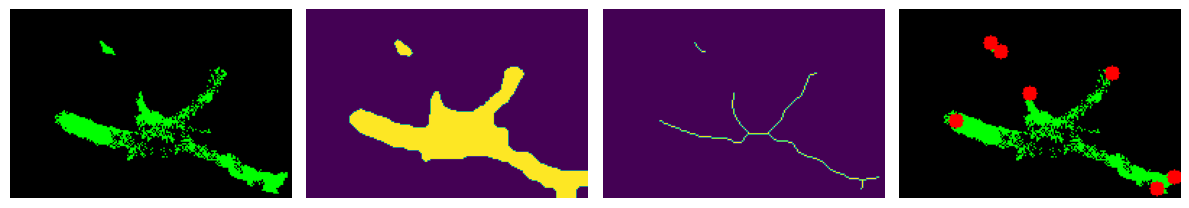

(x, y) endings: (52, 220), (83, 262), (93, 108), (154, 402), (156, 375), (164, 29), (164, 360), (165, 391), (193, 130), (197, 75), 


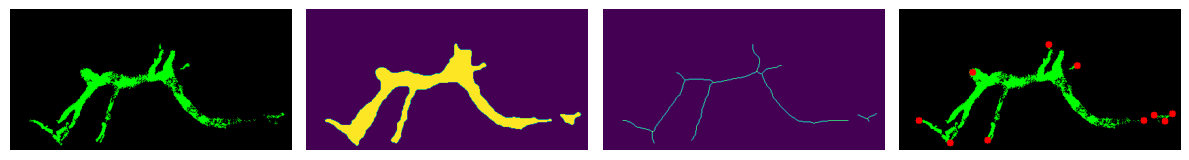

(x, y) endings: (59, 256), (62, 99), (71, 242), (88, 376), (101, 172), (130, 250), (135, 143), (147, 53), (169, 285), (171, 1), (180, 63), (185, 68), (194, 284), (195, 89), (205, 35), (206, 455), (210, 289), (219, 293), (221, 293), (226, 205), (283, 126), (287, 141), (289, 364), (315, 383), (320, 393), (332, 309), (340, 237), (341, 414), (344, 423), 


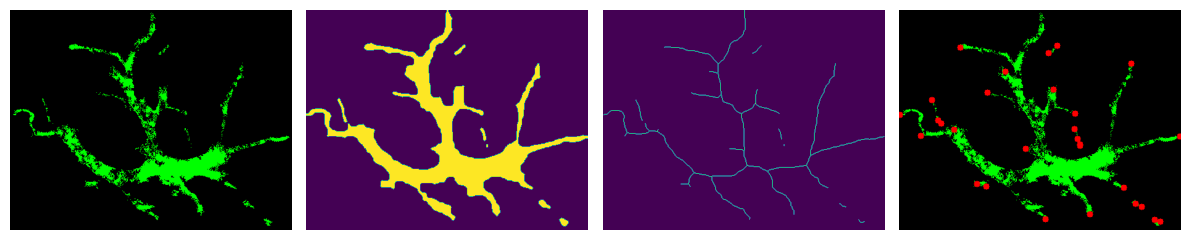

(x, y) endings: (35, 202), (36, 218), (62, 20), (116, 185), (158, 144), (178, 246), (195, 151), (199, 211), (278, 316), (312, 137), (336, 330), 


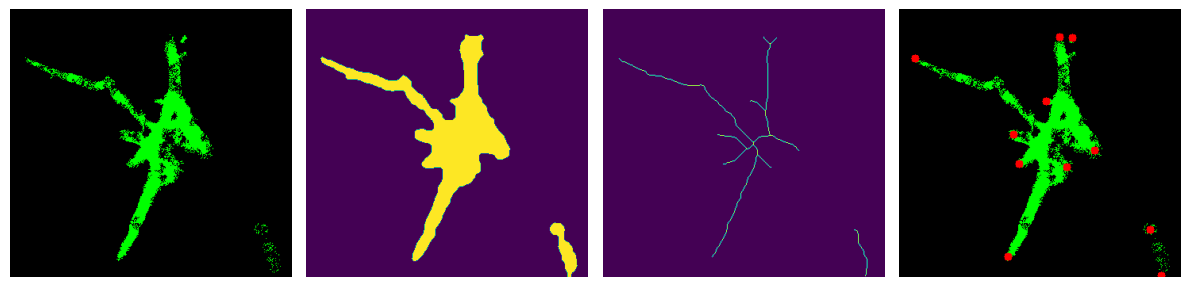

(x, y) endings: (39, 17), (54, 66), (71, 121), (146, 187), (156, 56), (167, 179), (176, 130), 


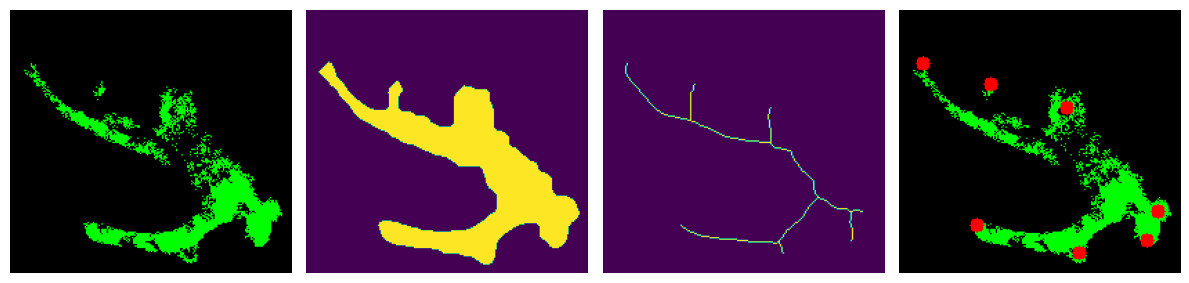

(x, y) endings: (18, 110), (25, 80), (50, 344), (56, 335), (59, 330), (60, 405), (64, 230), (68, 216), (79, 230), (88, 286), (102, 209), (106, 299), (118, 318), (119, 192), (131, 310), (140, 320), (140, 328), (143, 203), (147, 345), (148, 363), (181, 250), (227, 263), (231, 166), (238, 23), (246, 126), (247, 44), (259, 26), (268, 108), (273, 135), (273, 136), 


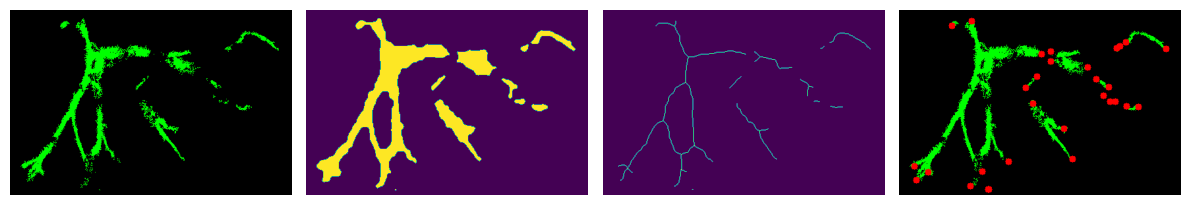

(x, y) endings: (26, 131), (28, 233), (66, 473), (72, 492), (73, 516), (95, 514), (96, 512), (146, 33), (148, 7), (150, 53), (161, 234), (167, 301), 


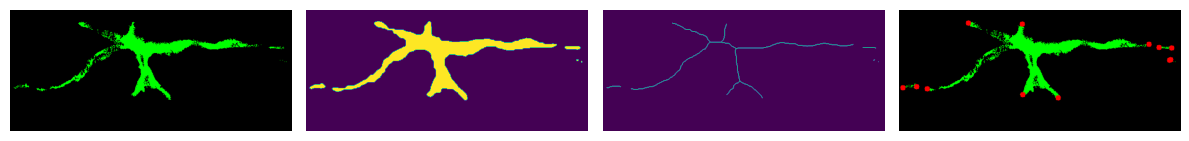

(x, y) endings: (25, 176), (64, 169), (167, 216), (210, 94), (263, 2), (297, 27), (318, 141), (362, 113), (382, 115), 


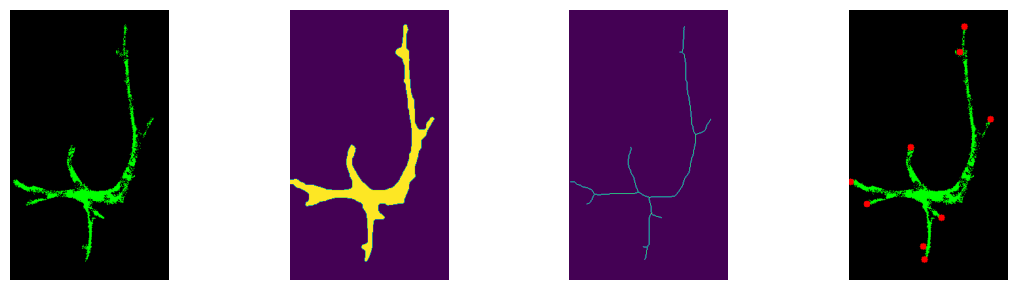

(x, y) endings: (22, 124), (65, 128), (105, 115), (141, 10), (168, 138), (205, 145), (239, 6), 


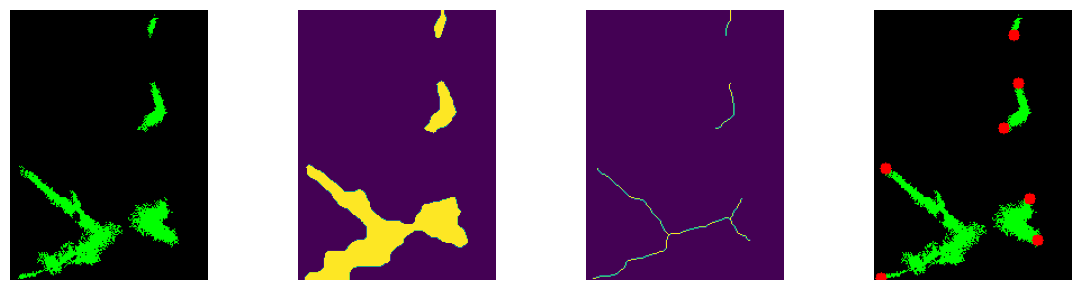

In [40]:
masks_dir = 'Lipachev_2024.03.16_astrocytes_examples/Lipachev_2024.02.27_astrocytes-test-thin'
# masks_dir = 'Lipachev_2024.03.16_astrocytes_examples/Lipachev_2024.02.27_astrocytes-test-thick'
for file in glob.glob(os.path.join(masks_dir, '*.tif')):
    image_orig = cv2.imread(file)
    image = image_orig.copy()
    b, g, r = cv2.split(image)
    binary_image = np.where(g == 255, 255, 0).astype(np.uint8)
    
    binary_image = cv2.dilate(binary_image, np.ones((13, 13), np.uint8) , iterations=1)
    binary_image = cv2.erode(binary_image, np.ones((11, 11), np.uint8) , iterations=1)
    
    binary_image = cv2.medianBlur(binary_image, 5)
    
    # plt.imshow(binary_image)
    # plt.axis('off')
    # plt.show()
    
    # Skeletonize the binary image
    skeleton = morphology.skeletonize(binary_image) # image need to be WHITE image on BLACK background 
    # print(type(skeleton))
    # plt.imshow(skeleton)
    # plt.axis('off')
    # plt.show()

    print("(x, y) endings: ", end='')
    one_neighbor_pixels = find_pixels_with_one_neighbor(skeleton)
    for x, y in one_neighbor_pixels:
        print(f"({x}, {y})", end = ', ')
        cv2.circle(image, (y, x), 5, (255, 0, 0), -1)
    print()
    
    fig, axs = plt.subplots(1, 4, figsize=(12, 3))  # Create a figure with 3 subplots

    for ax, img in zip(axs, [image_orig, binary_image, skeleton, image]):
        ax.imshow(img)
        ax.axis('off')  # Remove axis for better visualization
    
    plt.tight_layout()
    plt.show()